# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.663492e+01     1.282638e+01
 * time: 0.0018219947814941406
     1     3.061285e+01     8.063343e+00
 * time: 0.007479190826416016
     2     2.653568e+01     7.150741e+00
 * time: 0.012923002243041992
     3     2.236588e+01     4.789779e+00
 * time: 0.018375158309936523
     4     2.051705e+01     3.447277e+00
 * time: 0.05362510681152344
     5     1.913354e+01     2.460318e+00
 * time: 0.05834007263183594
     6     1.896903e+01     2.225275e+00
 * time: 0.06237912178039551
     7     1.826281e+01     1.622811e+00
 * time: 0.06638908386230469
     8     1.790196e+01     1.850405e+00
 * time: 0.07042217254638672
     9     1.760680e+01     1.307954e+00
 * time: 0.07445001602172852
    10     1.740449e+01     1.235710e+00
 * time: 0.07896113395690918
    11     1.727242e+01     1.166067e+00
 * time: 0.08352518081665039
    12     1.722190e+01     8.862483e-01
 * time: 0.08721399307250977
    13     1.718713e+01     8.475859e-01
 * 

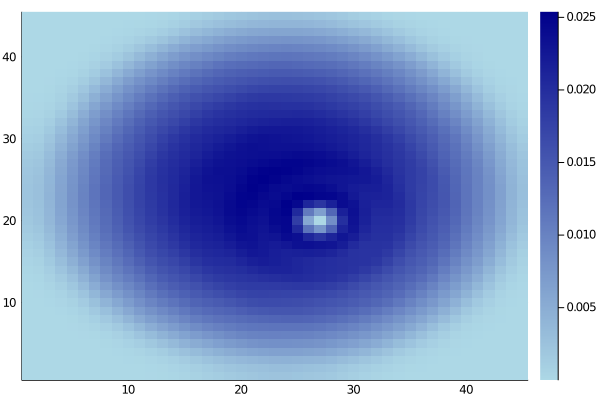

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)